In [1]:
#5.1 
# Kullandığımız kitaplıklar
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

# Verileri Yükleme
train_data = pd.read_csv("cure_the_princess_train.csv")
test_data = pd.read_csv("cure_the_princess_test.csv")
val_data = pd.read_csv("cure_the_princess_validation.csv")

# Verilerin hazırlanması
train_inputs = torch.tensor(train_data.drop("Cured", axis=1).values, dtype=torch.float32)
train_targets = torch.tensor(train_data["Cured"].values, dtype=torch.float32)
test_inputs = torch.tensor(test_data.drop("Cured", axis=1).values, dtype=torch.float32)
test_targets = torch.tensor(test_data["Cured"].values, dtype=torch.float32)
val_inputs = torch.tensor(val_data.drop("Cured", axis=1).values, dtype=torch.float32)
val_targets = torch.tensor(val_data["Cured"].values, dtype=torch.float32)

# Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(13, 100)
        self.hidden2 = nn.Linear(100, 50)
        self.out = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.sigmoid(self.out(x))
        return x

# Modeli optimize etme
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()
torch.manual_seed(180401028)

# Modeli eğitme
train_losses, val_losses = [], []
num_epochs = 1000
batch_size = 16

for epoch in range(num_epochs):
    for i in range(0, len(train_inputs), batch_size):
        batch_inputs = train_inputs[i:i+batch_size]
        batch_targets = train_targets[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_inputs).squeeze()
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()

    # Modeli eğitim ve doğrulama setlerinde değerlendirme
    with torch.no_grad():
        train_outputs = model(train_inputs).squeeze()
        train_loss = criterion(train_outputs, train_targets)
        train_losses.append(train_loss.item())

        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, val_targets)
        val_losses.append(val_loss.item())

        train_predictions = (model(train_inputs) > 0.5).float()
        test_predictions = (model(test_inputs) > 0.5).float()
        val_predictions = (model(val_inputs) > 0.5).float()

    
    if epoch > 10 and val_losses[-1] > val_losses[-3]:
        break

    # Eğitim ilerlemesini yazdırma
    if epoch % 1 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.5f} | Val Loss: {val_loss:.5f}")




Epoch 0 | Train Loss: 0.42474 | Val Loss: 0.37562
Epoch 1 | Train Loss: 0.38005 | Val Loss: 0.31282
Epoch 2 | Train Loss: 0.34762 | Val Loss: 0.28073
Epoch 3 | Train Loss: 0.33024 | Val Loss: 0.26546
Epoch 4 | Train Loss: 0.31701 | Val Loss: 0.25705
Epoch 5 | Train Loss: 0.30868 | Val Loss: 0.25640
Epoch 6 | Train Loss: 0.31034 | Val Loss: 0.26156
Epoch 7 | Train Loss: 0.29332 | Val Loss: 0.25004
Epoch 8 | Train Loss: 0.28989 | Val Loss: 0.25253
Epoch 9 | Train Loss: 0.25606 | Val Loss: 0.22933
Epoch 10 | Train Loss: 0.22393 | Val Loss: 0.21273
Epoch 11 | Train Loss: 0.20490 | Val Loss: 0.19919
Epoch 12 | Train Loss: 0.19153 | Val Loss: 0.19130
Epoch 13 | Train Loss: 0.17958 | Val Loss: 0.18546
Epoch 14 | Train Loss: 0.16807 | Val Loss: 0.17870
Epoch 15 | Train Loss: 0.15619 | Val Loss: 0.17178
Epoch 16 | Train Loss: 0.14987 | Val Loss: 0.17008
Epoch 17 | Train Loss: 0.13968 | Val Loss: 0.16567
Epoch 18 | Train Loss: 0.12972 | Val Loss: 0.16084
Epoch 19 | Train Loss: 0.12430 | Val Loss

Test Loss: 0.14022 | Test Acc: 0.94689


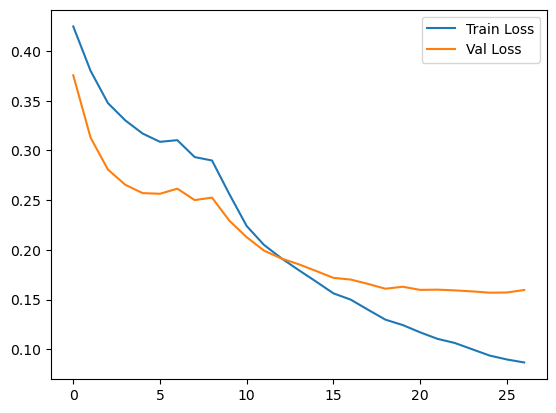

In [2]:
#5.2
# Modeli test setinde değerlendirme
test_outputs = model(test_inputs).squeeze()
test_loss = criterion(test_outputs, test_targets)
test_acc = ((test_outputs > 0.5).float() == test_targets).float().mean()

print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.show()

In [3]:
#5.3
# Değerlendirme metriklerini hesaplama
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

train_f1 = f1_score(train_targets, train_predictions)
train_acc = accuracy_score(train_targets, train_predictions)
train_recall = recall_score(train_targets, train_predictions)
train_precision = precision_score(train_targets, train_predictions)

test_f1 = f1_score(test_targets, test_predictions)
test_acc = accuracy_score(test_targets, test_predictions)
test_recall = recall_score(test_targets, test_predictions)
test_precision = precision_score(test_targets, test_predictions)

val_f1 = f1_score(val_targets, val_predictions)
val_acc = accuracy_score(val_targets, val_predictions)
val_recall = recall_score(val_targets, val_predictions)
val_precision = precision_score(val_targets, val_predictions)

# Değerlendirme metriklerini yazdırma
print("Train:")
print(f"F1 Score: {train_f1:.5f} | Accuracy: {train_acc:.5f} | Recall: {train_recall:.5f} | Precision: {train_precision:.5f}")
print("Test:")
print(f"F1 Score: {test_f1:.5f} | Accuracy: {test_acc:.5f} | Recall: {test_recall:.5f} | Precision: {test_precision:.5f}")
print("Val:")
print(f"F1 Score: {val_f1:.5f} | Accuracy: {val_acc:.5f} | Recall: {val_recall:.5f} | Precision: {val_precision:.5f}")

Train:
F1 Score: 0.97078 | Accuracy: 0.97125 | Recall: 0.96921 | Precision: 0.97236
Test:
F1 Score: 0.94626 | Accuracy: 0.94689 | Recall: 0.93041 | Precision: 0.96267
Val:
F1 Score: 0.93891 | Accuracy: 0.93949 | Recall: 0.93590 | Precision: 0.94194
